# Visualiser des projections
### Vue d'ensemble

Avec les exemples antérieurs, vous êtes capables d'obtenir des projections climatiques pour chaque bassin versant.

Faire ce travail en ligne est assez gourmand en termes de stockage nécessaire et de temps de calcul.  
Ainsi, j'ai fait l'ai fait pour vous.
Le code que j'ai utilisé est disponible sur `modules/Data_per_basin.py` (il n'est pas pensé pour Jupyter Notebooks, mais pour un IDE plus complet - nous le verrons après).

Nous allons d'abord charger les données de toutes les 21 projections du domaine CORDEX Afrique "complètes" pour les scénarios `historique`, `rcp45` et `rcp85`.

In [56]:
import pandas as pd
import seaborn as sns
from pathlib import Path
from matplotlib import pyplot as plt

sns.set_context('paper')

projections_path = Path(r'data/projections.csv')
projections = pd.read_csv(projections_path, header=[0, 1, 2, 3], index_col=0)
projections.index = pd.to_datetime(projections.index, format='%Y-%m-%d')
projections = projections.sort_index(axis=0)
projections = projections.sort_index(axis=1)
projections

Variable                                       pr  \
Experiment                             historical   
Zone                                           Q1   
Code            CCCma-CanESM2_r1i1p1_SMHI-RCA4_v1   
Production date                                     
1949-01-01                                    NaN   
1949-02-01                                    NaN   
1949-03-01                                    NaN   
1949-04-01                                    NaN   
1949-05-01                                    NaN   
...                                           ...   
2100-08-01                                    NaN   
2100-09-01                                    NaN   
2100-10-01                                    NaN   
2100-11-01                                    NaN   
2100-12-01                                    NaN   

Variable                                            \
Experiment                                           
Zone                                                 
Code            CCCma-CanESM2_r1i1p1_UQAM-CRCM5_v1   
Production date                                      
1949-01-01                                     NaN   
1949-02-01                                     NaN   
1949-03-01                                     NaN   
1949-04-01                                     NaN   
1949-05-01                                     NaN   
...                                            ...   
2100-08-01                                     NaN   
2100-09-01                                     NaN   
2100-10-01                                     NaN   
2100-11-01                                     NaN   
2100-12-01                                     NaN   

Variable                                                           \
Experiment                                                          
Zone                                                                
Code            CNRM-CERFACS-CNRM-CM5_r1i1p1_CLMcom-CCLM4-8-17_v1   
Production date                                                     
1949-01-01                                                    NaN   
1949-02-01                                                    NaN   
1949-03-01                                                    NaN   
1949-04-01                                                    NaN   
1949-05-01                                                    NaN   
...                                                           ...   
2100-08-01                                                    NaN   
2100-09-01                                                    NaN   
2100-10-01                                                    NaN   
2100-11-01                                                    NaN   
2100-12-01                                                    NaN   

Variable                                                   \
Experiment                                                  
Zone                                                        
Code            CNRM-CERFACS-CNRM-CM5_r1i1p1_SMHI-RCA4_v1   
Production date                                             
1949-01-01                                            NaN   
1949-02-01                                            NaN   
1949-03-01                                            NaN   
1949-04-01                                            NaN   
1949-05-01                                            NaN   
...                                                   ...   
2100-08-01                                            NaN   
2100-09-01                                            NaN   
2100-10-01                                            NaN   
2100-11-01                                            NaN   
2100-12-01                                            NaN   

Variable                                                       \
Experiment                                                      
Zone                                                            
Code     

### Extraire des données historiques de précipitation pour un bassin versant
Nous allons extraire des précipitations `pr`, pour la période `historique` et le bassin `Q16`.

L'opérateurs `.loc` et `.iloc` sont très utiles.  
`.dropna()` nous permet d'effecer les lignes ayant des valeurs manquantes.

In [57]:
precipitation_Q16 = projections.loc[:, ('pr', 'historical', 'Q16')]
precipitation_Q16 = precipitation_Q16.dropna()
precipitation_Q16

Code,CCCma-CanESM2_r1i1p1_SMHI-RCA4_v1,CCCma-CanESM2_r1i1p1_UQAM-CRCM5_v1,CNRM-CERFACS-CNRM-CM5_r1i1p1_CLMcom-CCLM4-8-17_v1,CNRM-CERFACS-CNRM-CM5_r1i1p1_SMHI-RCA4_v1,CSIRO-QCCCE-CSIRO-Mk3-6-0_r1i1p1_SMHI-RCA4_v1,ICHEC-EC-EARTH_r12i1p1_CLMcom-CCLM4-8-17_v1,ICHEC-EC-EARTH_r12i1p1_MPI-CSC-REMO2009_v1,ICHEC-EC-EARTH_r12i1p1_SMHI-RCA4_v1,ICHEC-EC-EARTH_r1i1p1_KNMI-RACMO22T_v1,ICHEC-EC-EARTH_r3i1p1_DMI-HIRHAM5_v2,...,MIROC-MIROC5_r1i1p1_SMHI-RCA4_v1,MOHC-HadGEM2-ES_r1i1p1_KNMI-RACMO22T_v2,MOHC-HadGEM2-ES_r1i1p1_SMHI-RCA4_v1,MPI-M-MPI-ESM-LR_r1i1p1_CLMcom-CCLM4-8-17_v1,MPI-M-MPI-ESM-LR_r1i1p1_MPI-CSC-REMO2009_v1,MPI-M-MPI-ESM-LR_r1i1p1_SMHI-RCA4_v1,MPI-M-MPI-ESM-LR_r1i1p1_UQAM-CRCM5_v1,NCC-NorESM1-M_r1i1p1_DMI-HIRHAM5_v1,NCC-NorESM1-M_r1i1p1_SMHI-RCA4_v1,NOAA-GFDL-GFDL-ESM2M_r1i1p1_SMHI-RCA4_v1
Production date,,,,,,,,,,,,,,,,,,,,,
1951-01-01,83.519684,121.468190,36.758717,146.037190,25.491802,102.123730,198.556550,151.576130,12.102794,16.903313,...,78.343630,37.757633,38.350212,3.725140,5.365904,4.155438,5.558324,1.029581e+00,0.000000,10.506733
1951-02-01,66.701980,114.186920,93.086020,97.948410,0.731013,0.120863,7.136539,8.096432,62.700867,51.630886,...,18.250160,35.200203,26.355572,63.339886,149.216490,87.115776,123.269485,3.606104e+00,34.728065,131.400710
1951-03-01,13.533960,30.095173,32.160248,63.526333,65.524475,48.408657,79.424720,56.389797,64.862200,4.706532,...,68.067535,5.378952,1.622949,30.288330,36.319523,16.594992,42.160374,8.976765e+00,13.180780,67.169426
1951-04-01,31.802258,90.403534,0.139217,5.506721,6.193367,48.648240,62.485306,38.176617,68.242485,13.176017,...,53.723854,99.432530,57.511055,11.241804,18.965336,19.481540,29.047138,6.006678e+00,58.357130,36.722160
1951-05-01,7.526340,6.714736,0.007512,2.745702,2.142334,2.003096,17.519630,22.742582,40.407350,19.514826,...,11.891293,56.480766,61.205124,16.071259,25.881443,22.229359,45.592075,1.296875e+00,5.980506,69.921820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-08-01,1.223462,5.447430,0.000000,1.296529,0.804608,0.000000,4.542453,7.754517,10.554913,1.549680,...,3.182339,3.256752,16.545517,0.949405,0.831823,9.003157,6.951947,4.960664e-12,15.517489,5.542110
2005-09-01,12.775834,3.176885,0.000021,28.656368,20.880362,18.994617,7.213900,1.276457,94.410270,62.334946,...,3.769685,8.674233,10.130928,7.088855,1.823097,3.172481,6.772432,7.478631e-03,10.104077,29.251100
2005-10-01,3.937473,24.244213,24.691935,51.917270,19.955510,23.131100,50.941883,154.923610,3.425956,63.178430,...,67.710290,11.272465,15.459032,23.005901,47.911884,42.378883,60.508102,1.821421e+01,30.471573,21.168930


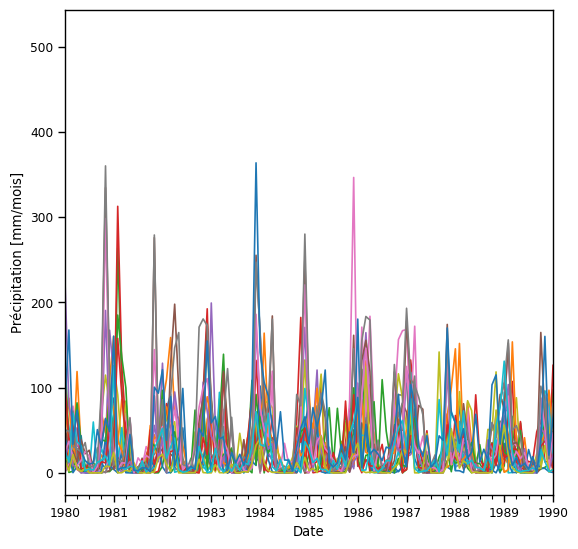

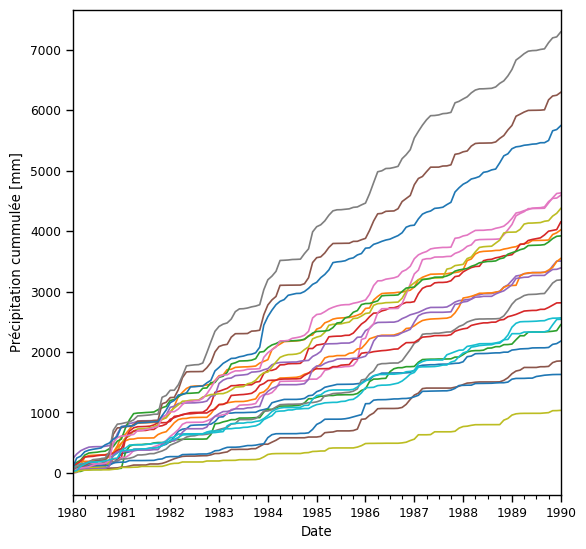

In [58]:
fig, ax = plt.subplots(figsize=(16/2.54,16/2.54))
precipitation_Q16.plot(ax=ax)
ax.set_xlim(('1980-01-01','1990-01-01'))
ax.get_legend().remove()
_ = ax.set_xlabel('Date')
_ = ax.set_ylabel('Précipitation [mm/mois]')

fig, ax = plt.subplots(figsize=(16/2.54,16/2.54))
precipitation_Q16.loc['1980-01-01':'1990-01-01',:].cumsum().plot(ax=ax)
ax.get_legend().remove()
_ = ax.set_xlabel('Date')
_ = ax.set_ylabel('Précipitation cummulée [mm]')

### Analyse
Attendiez-vous cela pour la période historique?


### Des pâtes...
![](img/Pasta.jpg)

### Et la température?

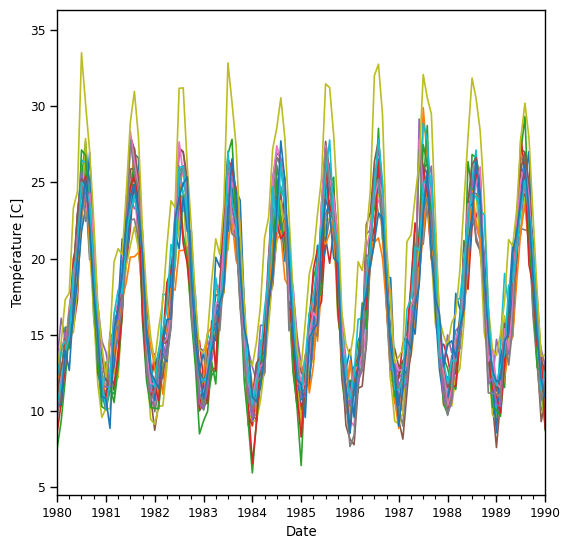

In [59]:
temperature_Q16 = projections.loc[:, ('tas', 'historical', 'Q16')]
temperature_Q16 = temperature_Q16.dropna()

fig, ax = plt.subplots(figsize=(16/2.54,16/2.54))
temperature_Q16.plot(ax=ax)
ax.set_xlim(('1980-01-01','1990-01-01'))
ax.get_legend().remove()
_ = ax.set_xlabel('Date')
_ = ax.set_ylabel('Température [C]')

### Une manière préférable de présenter des projections
#### **Regarder ces projections au mois prés n'est pas "logique"** dans le sens que les projections ont été conçues pour reproduire  des comportements statistiques, pas pour "deviner" la météorologie future.

Il faut analyser la variabilité des prévisions sur des périodes représentatives. Par exemple, des décennies.
Il est utile de regarder les données sur deux axes différents:
- Variabilité sur le long terme.
- Distribuition au cours de l'année (par décennie).

### Variabilité sur le long terme
La stratégie est d'adoucir la série temporelle de manière à mettre en evidence des tendences.  
Cela peut être accompli en utilisant les fonctions suivantes de Pandas:
- `.resample()` - cette fonction nous permet de changer le pas de temps de la série. Il est particulièrement intéressant d'utiliser un pas de temps annuel de façon à éliminer la variabilité saisonnière. 
- `.rolling()` - cette fonction applique une "moyenne" mobile aux données.

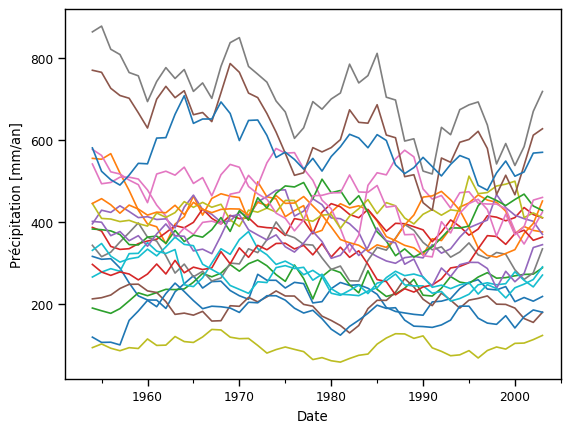

In [60]:
smooth_data = precipitation_Q16.resample('YS').sum().rolling(window=5+1, center=True).mean()
# 'YS' représente "year start"

ax = smooth_data.plot()
ax.get_legend().remove()
_ = ax.set_xlabel('Date')
_ = ax.set_ylabel('Précipitation [mm/an]')

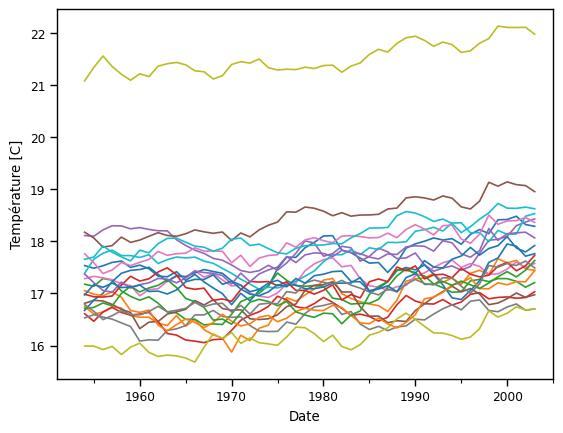

In [61]:
smooth_data = temperature_Q16.resample('YS').mean().rolling(window=5+1, center=True).mean()

ax = smooth_data.plot()
ax.get_legend().remove()
_ = ax.set_xlabel('Date')
_ = ax.set_ylabel('Température [C]')

### Consolidation
Il est essentiel de comprendre pourquoi il faut adoucir les séries.  
Il est aussi important de le faire correctement.  
Remarquez la fonction utilisée après `.resample('YS')`. Pour la précipitation c'était `.mean()`, tandis que pour la température `.sum()` à été utilisée.

### Exercice
Ci-dessous, essayez de charger des données RCP 8.5 pour voir l'évolution simulée des températures moyennes jusqu'à la fin du siècle.

In [62]:
temperature_rcp85_Q16 = projections.loc[:, ('tas'...
temperature_rcp85_Q16

SyntaxError: '(' was never closed (606540296.py, line 1)

### Distribuition au cours de l'année
Maintenant, l'idée c'est de regarder la distribution des projections le cours de l'année.  
La procédure c'est de prendre plusieurs années (représentatives d'une longue période) et analyser la distribution des variables ciblées.

Commençons par regarder une seule projection, de 1980 à 1989.

In [63]:
one_projection = temperature_Q16.loc['1980-01-10':'1989-12-31', :].iloc[:, [0]]
one_projection.columns = ['Température [C]']
one_projection

,Température [C]
Production date,
1980-02-01,11.960983
1980-03-01,15.485508
1980-04-01,15.539253
1980-05-01,16.979132
1980-06-01,21.041311
...,...
1989-08-01,23.476818
1989-09-01,23.321714
1989-10-01,21.239310


### Calculer l'année hydrologique et le mois
Nous allons maintenant ajouter de l'information sur l'année hydrologique et le mois à la matrice.

Après, en faisant recours à la fonction `.lineplot()` du module `seaborn` (ou `sns`), la visualisation devient facile.  
https://seaborn.pydata.org/index.html  
https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [64]:
hydrological_year_start = 9 # Mois de début de l'année hydrologique

# Définition d'une fonction "lambda" pour calculer l'année hydrologique
hydrological_year_function = lambda x: f'{x.year}/{str(x.year+1)[-2:]}' if x.month>=hydrological_year_start else f'{x.year-1}/{str(x.year)[-2:]}'

# Définition d'une fonction "lambda" pour calculer le mois de l'année hydrologique
hydrological_month_function = lambda x: (x.month - hydrological_year_start) % 12 + 1

# Ajouter de l'information à la matrice
one_projection.loc[:, 'Mois'] = one_projection.index.month
one_projection.loc[:, 'Année hydrologique'] = one_projection.index.map(hydrological_year_function)
one_projection.loc[:, 'Mois année hydrologique'] = one_projection.index.map(hydrological_month_function) 
one_projection

,Température [C],Mois,Année hydrologique,Mois année hydrologique
Production date,,,,
1980-02-01,11.960983,2,1979/80,6
1980-03-01,15.485508,3,1979/80,7
1980-04-01,15.539253,4,1979/80,8
1980-05-01,16.979132,5,1979/80,9
1980-06-01,21.041311,6,1979/80,10
...,...,...,...,...
1989-08-01,23.476818,8,1988/89,12
1989-09-01,23.321714,9,1989/90,1
1989-10-01,21.239310,10,1989/90,2


<Axes: xlabel='Mois année hydrologique', ylabel='Température [C]'>

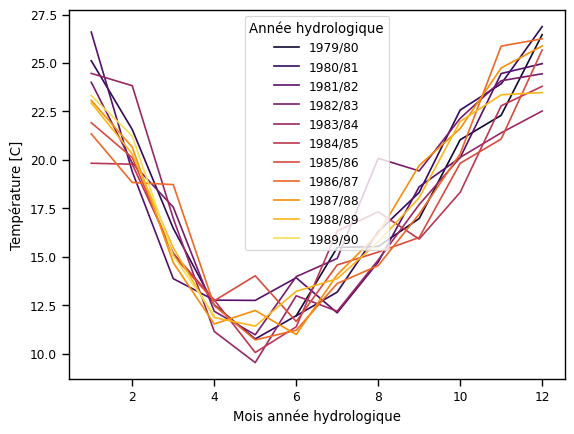

In [65]:
sns.lineplot(data=one_projection, x='Mois année hydrologique', y='Température [C]', hue='Année hydrologique', errorbar=None, palette='inferno')

<Axes: xlabel='Mois année hydrologique', ylabel='Température [C]'>

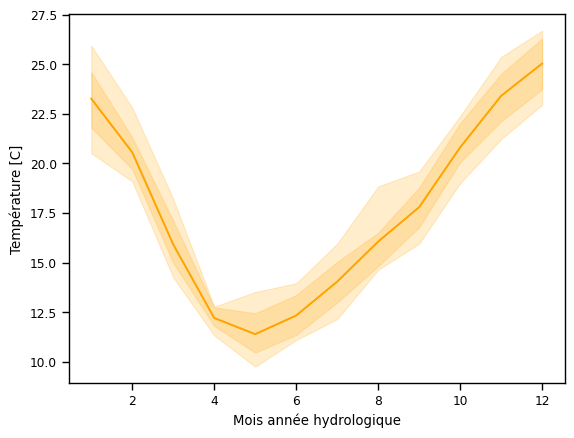

In [66]:
sns.lineplot(data=one_projection, x='Mois année hydrologique', y='Température [C]', errorbar=('pi', 90), color='orange')
sns.lineplot(data=one_projection, x='Mois année hydrologique', y='Température [C]', errorbar=('pi', 60), color='orange')

### Répéter la procédure pour plusieurs projections

Pour le faire, il faut s'appuier sur la fonction `.stack()` de `pandas` (ou `pd`).


In [67]:
several_projections = temperature_Q16.loc['1980-01-10':'1989-12-31', :]
several_projections = several_projections.stack().reset_index(level='Code', drop=False, inplace=False)
several_projections.columns = ['Projection', 'Température [C]']
several_projections

,Projection,Température [C]
Production date,,
1980-02-01,CCCma-CanESM2_r1i1p1_SMHI-RCA4_v1,11.960983
1980-02-01,CCCma-CanESM2_r1i1p1_UQAM-CRCM5_v1,10.987548
1980-02-01,CNRM-CERFACS-CNRM-CM5_r1i1p1_CLMcom-CCLM4-8-17_v1,11.609232
1980-02-01,CNRM-CERFACS-CNRM-CM5_r1i1p1_SMHI-RCA4_v1,10.339882
1980-02-01,CSIRO-QCCCE-CSIRO-Mk3-6-0_r1i1p1_SMHI-RCA4_v1,16.081753
...,...,...
1989-12-01,MPI-M-MPI-ESM-LR_r1i1p1_SMHI-RCA4_v1,11.720205
1989-12-01,MPI-M-MPI-ESM-LR_r1i1p1_UQAM-CRCM5_v1,10.717450
1989-12-01,NCC-NorESM1-M_r1i1p1_DMI-HIRHAM5_v1,13.598955


In [68]:
# Ajouter de l'information à la matrice
several_projections.loc[:, 'Mois'] = several_projections.index.month
several_projections.loc[:, 'Année hydrologique'] = several_projections.index.map(hydrological_year_function)
several_projections.loc[:, 'Mois année hydrologique'] = several_projections.index.map(hydrological_month_function) 
several_projections

,Projection,Température [C],Mois,Année hydrologique,Mois année hydrologique
Production date,,,,,
1980-02-01,CCCma-CanESM2_r1i1p1_SMHI-RCA4_v1,11.960983,2,1979/80,6
1980-02-01,CCCma-CanESM2_r1i1p1_UQAM-CRCM5_v1,10.987548,2,1979/80,6
1980-02-01,CNRM-CERFACS-CNRM-CM5_r1i1p1_CLMcom-CCLM4-8-17_v1,11.609232,2,1979/80,6
1980-02-01,CNRM-CERFACS-CNRM-CM5_r1i1p1_SMHI-RCA4_v1,10.339882,2,1979/80,6
1980-02-01,CSIRO-QCCCE-CSIRO-Mk3-6-0_r1i1p1_SMHI-RCA4_v1,16.081753,2,1979/80,6
...,...,...,...,...,...
1989-12-01,MPI-M-MPI-ESM-LR_r1i1p1_SMHI-RCA4_v1,11.720205,12,1989/90,4
1989-12-01,MPI-M-MPI-ESM-LR_r1i1p1_UQAM-CRCM5_v1,10.717450,12,1989/90,4
1989-12-01,NCC-NorESM1-M_r1i1p1_DMI-HIRHAM5_v1,13.598955,12,1989/90,4


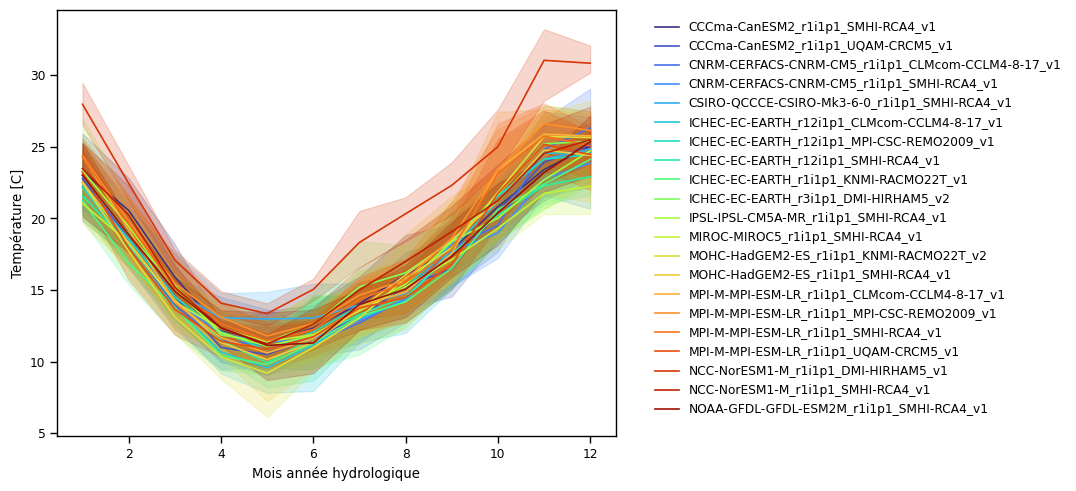

In [69]:
plt.figure(figsize=(11, 5))

ax = sns.lineplot(data=several_projections, x='Mois année hydrologique', y='Température [C]', hue='Projection', errorbar=('pi', 90), palette='turbo')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.tight_layout()

### Afficher la fonction de répartition (CDF)
La fonction de répartition est très importante pour le "Quantile Mapping"!

Code             CCCma-CanESM2_r1i1p1_SMHI-RCA4_v1
Production date                                   
1980-02-01                               11.960983
1980-03-01                               15.485508
1980-04-01                               15.539253
1980-05-01                               16.979132


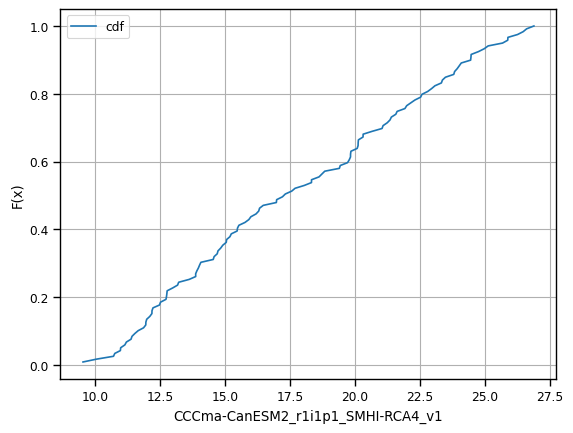

In [71]:
# Choisir une série
several_projections = temperature_Q16.loc['1980-01-10':'1989-12-31', :]
df = several_projections.iloc[:, [0]].dropna()
model = df.columns[0]

print(df.head(4))

# Get to the CDF directly
df['cdf'] = df.rank(method='average', pct = True)

# Sort and plot
ax = df.sort_values(model).plot(x=model, y='cdf', grid=True)
_ = ax.set_ylabel('F(x)')


### Exercice
Ci-dessous, essayez de répéter la dernière procédure pour la pluie.


In [33]:
several_projections = precipitation_Q16.loc['1980-01-10':'1989-12-31', :]
#...